In [1]:
import matplotlib.pyplot as plt
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

# Week 10 (Wednesday), AST 8581 / PHYS 8581 / CSCI 8581 / STAT 8581: Big Data in Astrophysics

### Michael Coughlin <cough052@umn.edu>, Jie Ding <dingj@umn.edu>


with contributions totally ripped off from Federica Bianco (Delaware, Gautham Narayan (UIUC), Michael Steinbach (UMN), and Nico Adams (UMN)

## Deep Learning

# Where do we stand?

Foundations of Data and Probability -> Statistical frameworks (Frequentist vs Bayesian) -> Estimating underlying distributions -> Analysis of Time series (periodicity) -> Analysis of Time series (variability) -> Analysis of Time series (stochastic processes) -> Gaussian Processes -> Decision Trees / Regression -> Dimensionality Reduction -> Principle Component Analysis -> Clustering -> Density Estimation / Anomaly Detection -> Supervised Learning -> Deep Learning

<table>
<thead>
  <tr>
    <th>Method</th>
    <th>Unsupervised</th>
    <th>Supervised</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>Centroid-based</td>
    <td>k-Means</td>
    <td>kNN w/ k=1 (aka Nearest Centroid) </td>
  </tr>
  <tr>
    <td>Linkage-based Model</td>
    <td>Hierarchical Clustering</td>
    <td>Decision Trees/Random Forests</td>
  </tr>
  <tr>
    <td>Parametric Density Model</td>
    <td>GMMs, Extreme Deconvolution</td>
    <td>Gaussian Naive Bayes, LDA, QDA</td>
  </tr>
  <tr>
    <td>Nonparametric Density/Locally Weighted*</td>
    <td>DBSCAN/Optics</td>
      <td>kNN with k>1, <strong>SVM, MLPs, DNN</strong></td>
  </tr>
</tbody>
</table>

* = KDEs are perfectly useable in either column

<img src="figures/mindmap.jpg">

<img src="figures/perceptron1.png">

<img src="figures/perceptron2.png">

<img src="figures/perceptron3.png">

## OK, but how do we get the weights when this is linear regression, but the output is binary (0, 1)

### Recall the discriminant function from Monday:


## $$\begin{eqnarray} \widehat{y} & = & \left\{ \begin{array}{cl} 1 & \mbox{if $g(x) > \theta$}, \\ 0 & \mbox{otherwise,} \end{array} \right. \end{eqnarray}$$

Where $\theta$ is the **threshold**

We compare the output vector $y$ to the target/truth $t$ and we want to minimize the error

## $$ E = 1/2 \cdot (t-y)^2$$

To minimize the error, we need to change the weights of the inputs to get $t$ close to $y$.

Let's do this with our old friend, **gradient descent**

## $$w_i = w'_i - \eta \cdot \frac{dE}{dw_i} $$

Where $\eta$ is some constant that we'll call the **learning rate**

## $$w_i = w'_i + \eta \cdot (t-y) \cdot\frac{dy}{dw_i} $$

## $$\frac{dy}{dw_i} = x_i $$

so..

## $$w_i = w'_i + \eta \cdot (t-y) \cdot x_i $$


If $y != t$ (and remember the t is just a 0 or 1):
## $$ w_{\text{new}}  = w_{\text{old}} + \eta \cdot t \cdot x$$

and $y == t$, don't update

<img src="figures/perceptron4.png">

<img src="figures/perceptron5.png">

<img src="figures/perceptron6.png">

- The Rosenblatt Perceptron uses the class labels to learn model coefficients

- The Adaline Neuron uses continuous predicted values (from the net input) to learn the model coefficients, which is more “powerful” since it tells us by “how much” we were right or wrong
    - the weights are how sensitive a neuron is 
    - the activation function turns neurons on/off 
    - The loss function of the network is updated to penalize models in proportion to the magnitude of their activation
    - prevents updating weights when y gets close to t - i.e. prevents overfitting!

    
## $$w_i = w'_i + \eta \cdot (t-y) \cdot\frac{df(y)}{dw_i} $$

<img src="figures/adaline_vs_perceptron.png">

<img src="figures/activation_functions.png">

<img src='figures/dl4.png'>

<img src='figures/dl5.png'>

## In-not actually class-class exercise:

https://jalammar.github.io/feedforward-neural-networks-visual-interactive/

<img src="figures/mlp1.png">

<img src="figures/mlp2.png">

## Why have one hidden layer when you can have two for twice the price!

<img src="figures/dnn1.png">

<img src="figures/dnn2.png">

<img src='figures/fig-dl2.png'>

# Types of neural networks
## - "Neural Network Zoo" (Asimov Institute)
<img src="http://www.asimovinstitute.org/wp-content/uploads/2016/09/neuralnetworks.png">


This is clearly much more sophisticated than our basic perceptron. "Deep" networks consist of tens of layers with thousands of neurons. These large networks have become usable thanks to two breakthroughs: the use of sparse layers and the power of graphics processing units (GPUs).
Many image processing tasks involve convolving an image with a 2-dimensional kernel as shown below.
![Convolution example](https://developer.apple.com/library/content/documentation/Performance/Conceptual/vImage/Art/kernel_convolution.jpg)

The sparse layers or convolutional layers in a deep network contain a large number of hidden nodes but very few synapses. The sparseness arises from the relatively small size of a typical convolution kernel (15x15 is a large kernel), so a hidden node representing one output of the convolution is connected to only a few input nodes. Compare this the our previous perceptron, in which every hidden node was connected to every input node.

Even though the total number of connections is greatly reduced in the sparse layers, the total number of nodes and connections in a modern deep network is still enormous. Luckily, training these networks turns out to be a great task for GPU acceleration! Serious work using neural networks is almost always done usign specialized GPU-accelerated platforms.

# Deep learning frameworks

## - Python(-compatible) - like sklearn only for NN models:
- Tensorflow (Google)
- Keras (frontend for TensorFlow + Theano)
- Theano (Université de Montréal)
- Caffe (UC Berkeley)
- CNTK (Microsoft)
- MXNet (Amazon+Baidu+...)

# In-class warm-up: Implementing a simple MLP Classifier with `sklearn`

Our neural network will take an $\mathbf{x} = (x_1, x_2)$ vector as input and output a $K$-dimensional vector $\mathbf{p}=(p_1,\dots,p_K)$ of class probabilities. For simplicity we'll focus on a single choice of activation function, the ReLU function $f(x) = \max(x, 0)$.

In [2]:
# Imports / plotting configuration
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
plt.rcParams['image.interpolation'] = 'nearest'  # hard classification boundaries
plt.rcParams['image.cmap'] = 'viridis'
np.random.seed(13)

In [4]:
def spiral_data(N, K=3, sigma=0.1):
    '''
    Generate spiral sample data
    N = num points
    K = num spiral arms
    sigma = some noise
    '''
    X = np.zeros((N * K, 2))
    y = np.zeros(N * K, dtype='int')

    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0.0, 1, N)  # radius
        theta = 2 * np.pi * j / K + np.linspace(0, 3 * np.pi, N) + np.random.randn(N) * sigma
        X[ix] = np.c_[r * np.sin(theta), r * np.cos(theta)]
        y[ix] = j
        
    return X, y

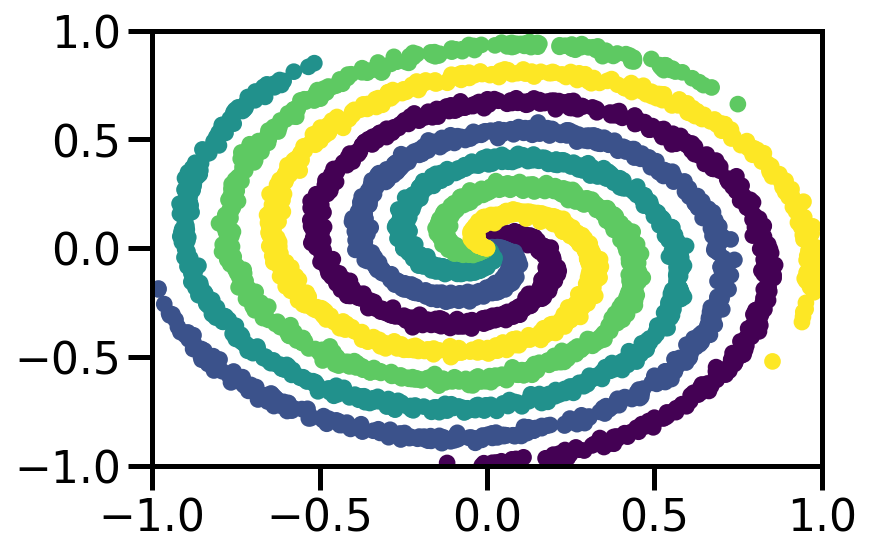

In [13]:
N = 1000
K = 5
sigma = 0.1
X, y = spiral_data(N, K, sigma)

# Visualize the generated data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis')
plt.xlim([-1, 1])
plt.ylim([-1, 1]);

In [14]:
from sklearn.base import BaseEstimator, ClassifierMixin

class SingleLayerReLU(BaseEstimator, ClassifierMixin):
    """Skeleton code for single-layer multi-class neural network classifier w/ ReLU activation.
    NOTE: Whenever you change the code below, you need to re-run this cell AND re-initialize
    your model (`model = SingleLayerNet(...)`) in order to update your specific `model` object.
    """
    def __init__(self, hidden_size, num_classes, sigma_init=0.01):
        """Initialize weights with Gaussian noise scaled by `sigma_init` and
        biases with zeros.
        """
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.W1 = sigma_init * np.random.randn(hidden_size, 2)
        self.W2 = sigma_init * np.random.randn(num_classes, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.b2 = np.zeros(num_classes)
    
    def loss(self, y, P):
        """Compute total softmax loss.
        Inputs:  y -> (N,) array of true (integer) labels
                 p -> (N, K) array of predicted probabilities
        Outputs: L -> total loss value       
        """
        return -np.sum(np.log(P[range(len(P)), y]))
        
    def dloss(self, X, y):
        """Compute gradient of softmax loss with respect to network weights.
        Inputs:  X -> (N, 2) array of network inputs
                 y -> (N,) array of true labels
        Outputs: dW1 -> (hidden_size, 2) array of weight derivatives
                 dW2 -> (hidden_size, 2) array of weight derivatives
                 db1 -> (hidden_size,) array of bias derivatives
                 db2 -> (hidden_size,) array of bias derivatives
        """
        H = np.maximum(0, X @ self.W1.T + self.b1)  # ReLU activation
        Z = H @ self.W2.T + self.b2
        P = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)

        dZ = P
        dZ[range(len(X)), y] -= 1

        dW2 = (H.T @ dZ).T
        db2 = np.sum(dZ, axis=0)

        dH = dZ @ self.W2
        dH[H <= 0] = 0  # backprop ReLU  activation

        dW1 = (X.T @ dH).T
        db1 = np.sum(dH, axis=0)
        
        return (dW1, dW2, db1, db2)

    def predict_proba(self, X):
        """Compute forward pass for all input values.
        Inputs:  X -> (N, 2) array of network inputs
        Outputs: P -> (N, K) array of class probabilities
        """
        H = np.maximum(0, X @ self.W1.T + self.b1)  # ReLU activation
        Z = H @ self.W2.T + self.b2
        P = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
        
        return P
        
    def predict(self, X):
        """Compute most likely class labels for all input values.
        Inputs:  X -> (N, 2) array of network inputs
        Outputs: P -> (N, K) array of class probabilities
        """
        P = self.predict_proba(X)
        return np.argmax(P, 1)
        
    def fit(self, X, y, step_size=3e-3, n_iter=10000):
        """Optimize model parameters W1, W2, b1, b2 via gradient descent.
        Inputs:  X -> (N, 2) array of network inputs
                 y -> (N,) array of true labels
                 step_size -> gradient descent step size
                 n_iter -> number of gradient descent steps to perform
        Outputs: losses -> (n_iter,) array of loss values after each step
        """
        losses = np.zeros(n_iter + 1)
        for i in range(0, n_iter + 1):
            dW1, dW2, db1, db2 = self.dloss(X, y)
            self.W1 -= step_size * dW1
            self.W2 -= step_size * dW2
            self.b1 -= step_size * db1
            self.b2 -= step_size * db2
            
            P = self.predict_proba(X)
            losses[i] = self.loss(y, P)
            
            if i % 1000 == 0:
                print("Iteration {}: loss={}".format(i, losses[i]))
        return losses

In [48]:
def visualize_predictions(model, X, y, step=0.02):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c='k', s=43)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Accuracy: {:.2f}%".format(100 * np.mean(y == model.predict(X))))

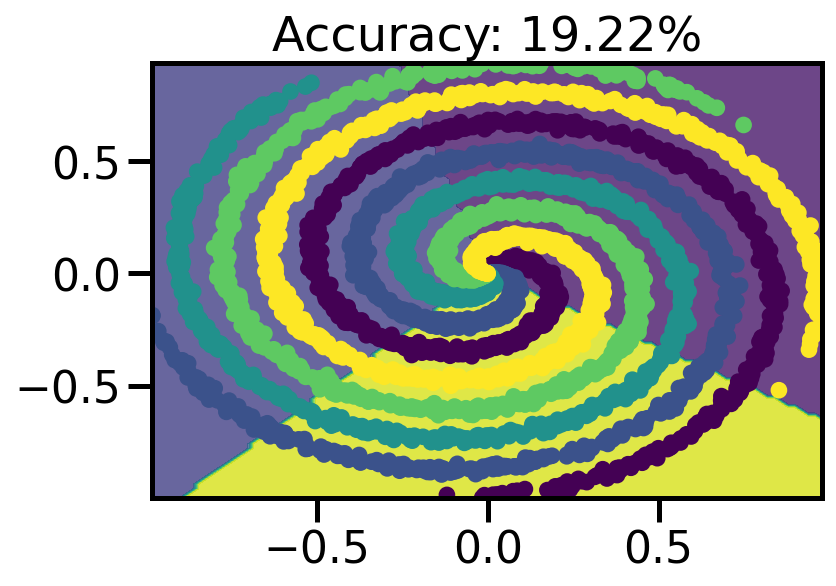

In [27]:
model = SingleLayerReLU(hidden_size=10, num_classes=5)
visualize_predictions(model, X, y)

Iteration 0: loss=8046.8992021653285
Iteration 1000: loss=11058.29705586705
Iteration 2000: loss=9837.025494563306
Iteration 3000: loss=12382.125544882207
Iteration 4000: loss=10084.348752334128
Iteration 5000: loss=10042.243093116122
Iteration 6000: loss=13382.119278533599
Iteration 7000: loss=11020.936991510684
Iteration 8000: loss=8805.926676260444
Iteration 9000: loss=9235.019048071474
Iteration 10000: loss=11362.693213632712


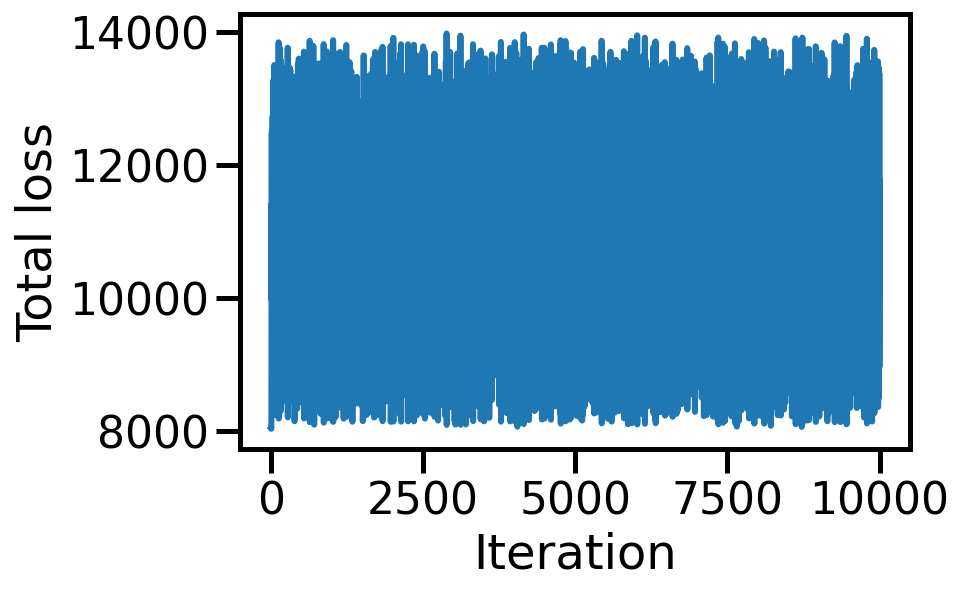

<Figure size 432x288 with 0 Axes>

In [29]:
model = SingleLayerReLU(hidden_size=10, num_classes=5)
losses = model.fit(X, y)
plt.plot(losses, '-')
plt.xlabel('Iteration')
plt.ylabel('Total loss');
#plt.figure();
plt.show();

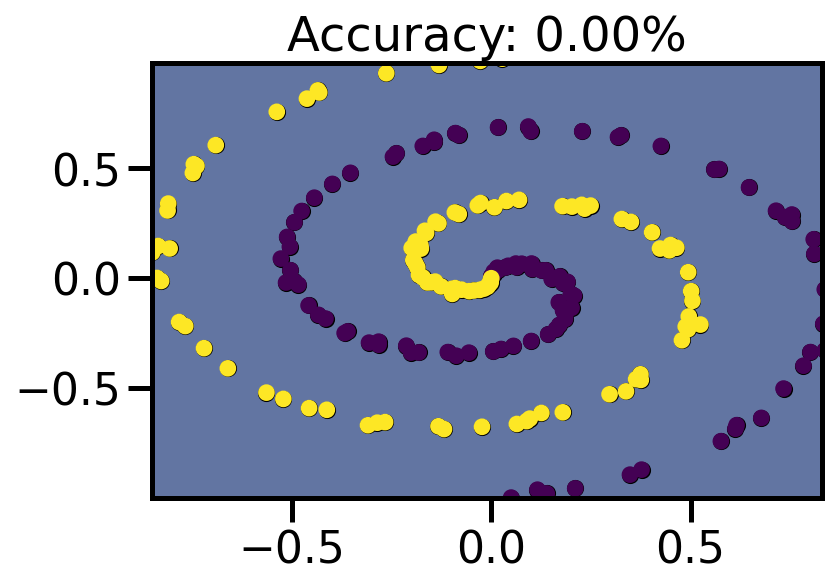

In [60]:
visualize_predictions(model, X, y)

In [41]:
from sklearn.neural_network import MLPClassifier

X, y = spiral_data(100, 5, 0.1)
single_layer_model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='sgd', max_iter=100000, tol=1e-6)
single_layer_model.fit(X, y)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=100000, solver='sgd',
              tol=1e-06)

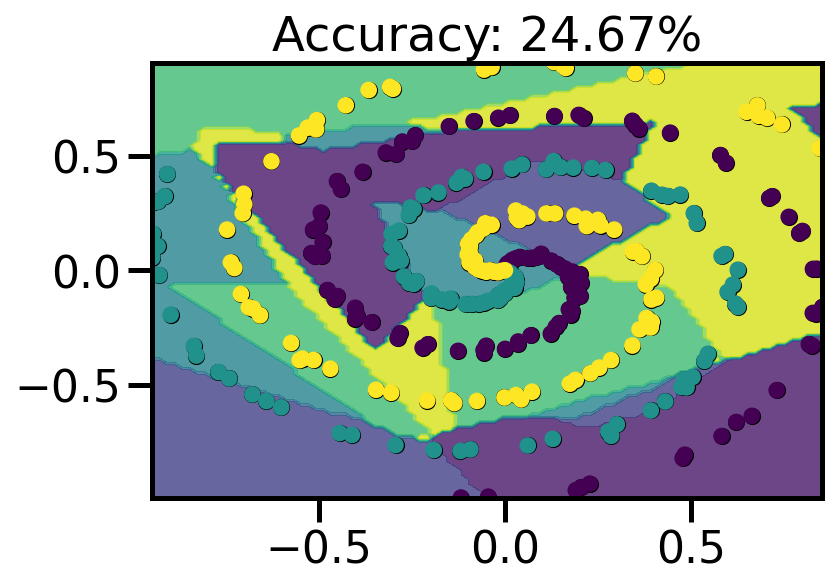

In [49]:
visualize_predictions(single_layer_model, X, y)

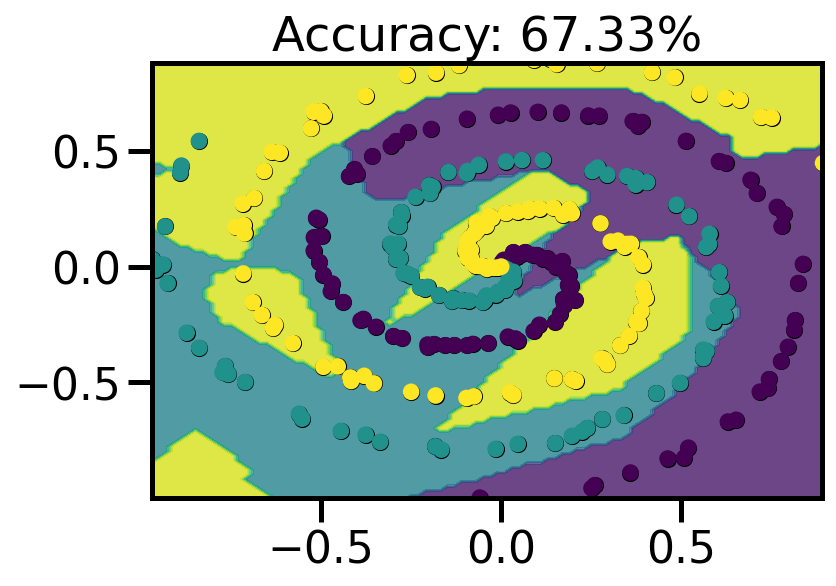

In [61]:
X, y = spiral_data(100, 3, 0.1)
multi_layer_model = MLPClassifier(hidden_layer_sizes=(10,10,10,10), activation='relu', solver='sgd', max_iter=100000, tol=1e-6)
multi_layer_model.fit(X, y)
visualize_predictions(multi_layer_model, X, y)

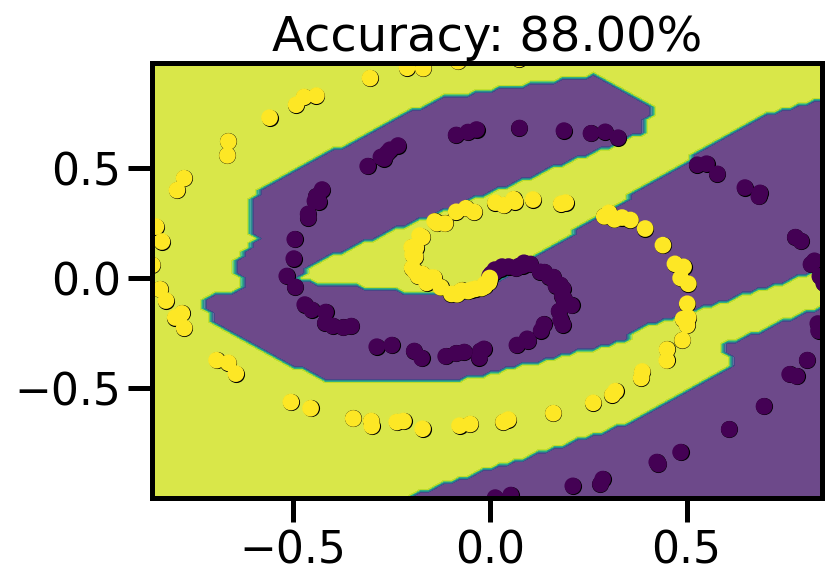

In [68]:
# you can view the activations of the final layer if needed
from copy import deepcopy

X, y = spiral_data(100, 2, 0.1)
multi_layer_model = MLPClassifier(hidden_layer_sizes=(10,10,10,10,10), activation='relu', solver='sgd', max_iter=100000, tol=1e-6)
multi_layer_model.fit(X, y)
visualize_predictions(multi_layer_model, X, y)

def visualize_activations(model, unit, X, y, step=0.02):
    """Visualize activations of ith neuron of last layer."""
    model = deepcopy(model)
    model.coefs_[-1][:unit] = 0  # zero out other units
    model.coefs_[-1][unit] = 1  # just want the activation function
    model.coefs_[-1][(unit + 1):] = 0  # zero out other units
    
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c='k', s=44)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    

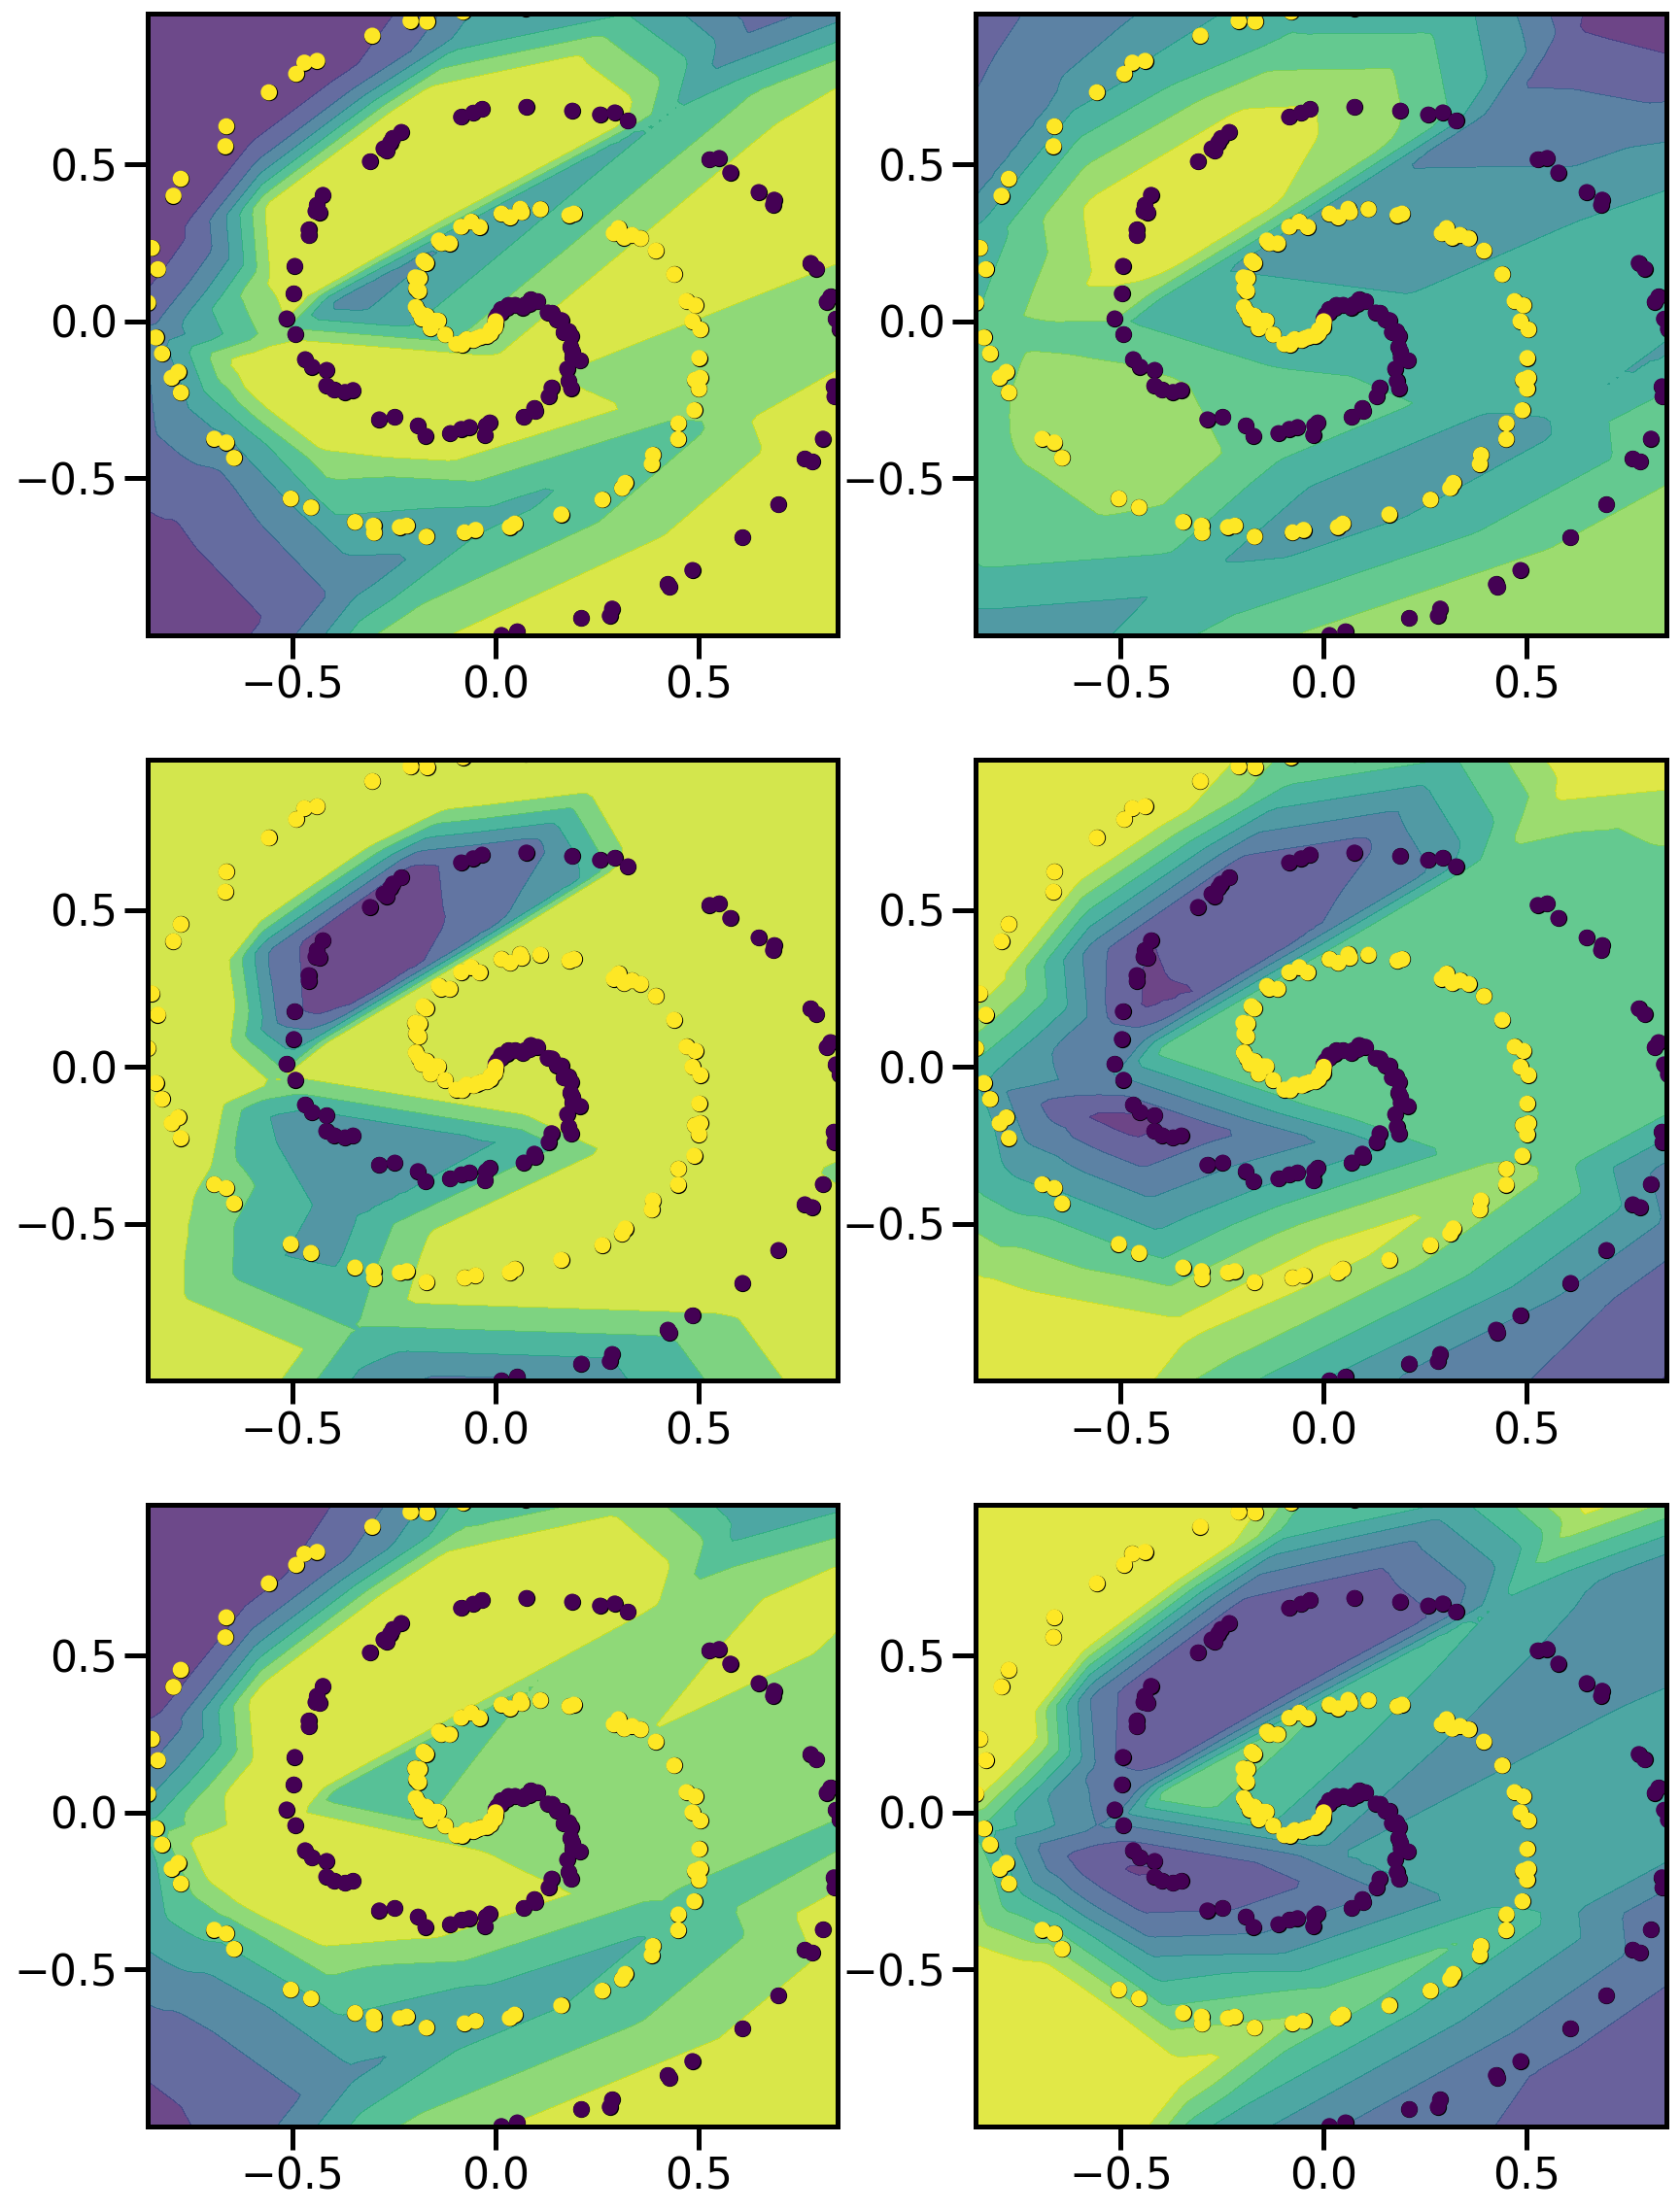

In [85]:
fig, ax = plt.subplots(3, 2, figsize=(14, 20))
for i in range(len(multi_layer_model.coefs_[-1])) if i < 6 else range(6):
    try:
        plt.sca(ax.flatten()[i])
    except:
        print("oopsie! I did it a {}th time".format(i))
        print(multi_layer_model.coefs_[-1].shape)
    #print("Visualizing unit {}".format(i))
    visualize_activations(multi_layer_model, i, X, y)

# Demo for later
## [http://playground.tensorflow.org](http://playground.tensorflow.org/#dataset=spiral)

## In-class exercise: Subtraction of Sinusoidal Noise
=================================================

In this example, we will do a simple regression problem where an unwanted constant frequency is added to the desired output signal as follows

\begin{align}
s(t) &= \sin(2\pi f_s t)\quad \text{true signal we want}\\
n(t) &= A_n \sin(2\pi f_n t + \phi_n)\quad \text{noise we want the network to subtract}\\
d(t) &= s(t) + n(t) \quad \text{the system output is the signal}
\end{align}

The trick with this regression problem is that we only get to see $d(t)$ and $n(t)$ so we don't actually have the target. Even worse, we may have very little information (in the real world) about what $s(t)$ actually looks like so ensuring that the networks are 'well-behaved' is critical. 

We will again use the mean square error as our cost function. Therefore, the network will aim to minimize 

\begin{equation}
J = \sum_i^{N-1} \left(d(t_i) - f[n(t_i)]\right)^2
\end{equation}

where the function on the noise (the 'witness channel') is adjusting the phase and amplitude of the noise until it is able to reduce the MSE as much as possible. NOTE: The lowest possible value of the MSE is not zero, it is 

\begin{equation}
J_{min} = \sum_i^{N-1} s^2(t_i) = \frac{1}{2}
\end{equation}

In [86]:
# do imports
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.io as sio
import scipy.signal as sig

np.random.seed(3301)
from keras.models import Sequential
from keras.layers import Dense, LSTM

2023-03-29 10:22:42.048111: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 10:22:43.972814: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-29 10:22:44.235160: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-29 10:22:44.235269: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
# let's define the signals
dur = 32
sample_rate = 128
true_freq = 13.4
noise_freq = 5.8
noise_phase = np.pi/4
noise_amp = 0.25
t = np.linspace(0, dur, dur*sample_rate)
s = np.sin(2*np.pi*true_freq * t)
n = noise_amp * np.sin(2*np.pi*noise_freq*t + noise_phase)

# when we generate the signal, we will adjust the phase so that the witness to the noise it out of phase.
# this will force the network to learn the phase as well as the amplitude
d = s + noise_amp * np.sin(2*np.pi*noise_freq*t)  # this is the last time that we will reference 's' until the end

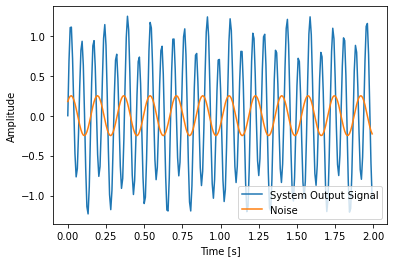

In [3]:
# plot the combined system output and the noise
vis = 2 * sample_rate
plt.plot(t[:vis], d[:vis], label='System Output Signal')
plt.plot(t[:vis], n[:vis], label='Noise')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()
plt.close()

Before we construct the network architecture for this problem, let's think about what we need:

  - The noise is added linearly, so we only need linear activation functions
  - The only adjustable parameters are the phase angle and the amplitude of the noise

This means that a linear feed-forward network with 2 neurons should be enough to capture the dependence of the noise on the system. Usually we will not have this much information, so we have to try to overtrain the network (ensure it *can* converge, and then shrink the parameter space until we have good results and no overtraining)

Let's first split our data into training and testing sets and then create the network for this problem

In [4]:
# make training and testing data
# let's train on 24 seconds and test on 8
x_train = n[:24*sample_rate]
y_train = d[:24*sample_rate]

x_test = n[24*sample_rate:]
y_test = d[24*sample_rate:]

In [ ]:
# build the network. We will output 1 data point for each input point. So this network is "one-to-one" or "single-in-single-out"
model = Sequential()
model.add(Dense(2, input_dim=1, activation='linear'))
model.add(...
model.compile(...
history = model.fit(...
y_hat = model.predict(x_test)

In [ ]:
# let's log the loss functions and plot them 
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(0.5, color='black', ls='--')
plt.legend()
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show('sine_loss.png')
plt.close()

In [ ]:
y_hat = y_hat.reshape(y_hat.size)
clean = y_test - y_hat
mse = ((clean[-2*sample_rate:] - s[-2*sample_rate:])**2).mean()
plt.plot(t[30*sample_rate:], s[30*sample_rate:], label='True Signal')
plt.plot(t[30*sample_rate:], clean[-2*sample_rate:], label='True Signal Estimate', ls='--')
plt.plot(t[30*sample_rate:], (clean[-2*sample_rate:]-s[30*sample_rate:]), label='Residual')
plt.legend()
plt.title('MSE = {}'.format(mse))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()
plt.close()

In [ ]:
noise_floor = 0.01 * np.random.rand(s.size)
freq, clean_psd = sig.welch(clean+noise_floor[:clean.size], fs=sample_rate, nperseg=sample_rate*8)
_, signal_psd = sig.welch(s+noise_floor, fs=sample_rate, nperseg=sample_rate*8)
_, d_psd = sig.welch(d+noise_floor, fs=sample_rate, nperseg=sample_rate*8)
plt.semilogy(freq, d_psd, label='System Signal')
plt.semilogy(freq, signal_psd, label='True Signal')
plt.semilogy(freq, clean_psd, label='True Signal Estimate')
plt.axvline(noise_freq, label='$f_n={}$ Hz'.format(noise_freq), ls='--', color='black')
plt.axvline(true_freq, label='$f_s={}$ Hz'.format(true_freq), ls='--', color='black')
plt.legend(loc='upper right')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density')
plt.xlim([3, 30])
plt.ylim([1e-9, 1e2])
plt.grid(True)
plt.title('PSD of Target and Network Output')
plt.show()
plt.close()

Hmm, this doesn't look very good. The network has not gotten rid of the noise power at $5.8$ Hz. Why is this? Well, to first give you a hint, let us rerun the network, but this time, we will not make any adjustments to the phase of the input signals

In [ ]:
d = s + n

x_train = n[:24*sample_rate]
y_train = d[:24*sample_rate]

x_test = n[24*sample_rate:]
y_test = d[24*sample_rate:]

model = Sequential()
model.add(...
model.add(...
model.compile(...
history = model.fit(...
y_hat = model.predict(x_test)
y_hat = y_hat.reshape(y_hat.size)

# let's log the loss functions and plot them 
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(0.5, color='black', ls='--')
plt.legend()
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show('addition_loss.png')
plt.close()

clean = y_test - y_hat
mse = ((clean[-2*sample_rate:] - s[-2*sample_rate:])**2).mean()
plt.plot(t[30*sample_rate:], s[30*sample_rate:], label='True Signal')
plt.plot(t[30*sample_rate:], clean[-2*sample_rate:], label='True Signal Estimate', ls='--')
plt.plot(t[30*sample_rate:], (clean[-2*sample_rate:]-s[30*sample_rate:]), label='Residual')
plt.legend()
plt.title('MSE = {}'.format(mse))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()
plt.close()

noise_floor = 0.01 * np.random.rand(s.size)
freq, clean_psd = sig.welch(clean+noise_floor[:clean.size], fs=sample_rate, nperseg=sample_rate*8)
_, signal_psd = sig.welch(s+noise_floor, fs=sample_rate, nperseg=sample_rate*8)
_, d_psd = sig.welch(d+noise_floor, fs=sample_rate, nperseg=sample_rate*8)
plt.semilogy(freq, d_psd, label='System Signal')
plt.semilogy(freq, signal_psd, label='True Signal')
plt.semilogy(freq, clean_psd, label='True Signal Estimate')
plt.axvline(noise_freq, label='$f_n={}$ Hz'.format(noise_freq), ls='--', color='black', alpha=0.5)
plt.axvline(true_freq, label='$f_s={}$ Hz'.format(true_freq), ls='--', color='black', alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density')
plt.xlim([3, 30])
plt.ylim([1e-9, 1e2])
plt.grid(True)
plt.title('PSD of Target and Network Output')
plt.show()
plt.close()

This is a vast improvement. Evidently, the additional phase gave the network problems. The reason is because of the way we trained, namely, as a "one-to-one" network. When we feed in 1 time-step at a time, there's not a great way to put into context that there has been a phase shift.

We can even explain the final loss value of 0.5166. We know that 0.5 of this should come from the true signal. But what about the last 0.0166? The amplitude of the noise is 1/4 and the average of the sine gives us a 1/2 so we end up with $\left(\frac{1}{2}\right)^2 \left(\frac{1}{4}\right)^2 = \frac{1}{64} = 0.0156$ which is within 1 part in 1000. 

Try adjusting the amplitude of the noise to say 0.5 instead of 0.25 and you should find a residual of about $\frac{1}{2} + \left(\frac{1}{2}\right)^2\left(\frac{1}{2}\right)^2 =\frac{1}{2}+\frac{1}{16} = 0.5625$ (on doing this I get 0.5637)

## Adding "Context" to the Network

The base question here is this: How do we get the network to 'know' that there is a just a phase shift of a sine wave and it has the correct information to regress the noise? The short answer is that we need to show it 'chunks' of data at a time, rather than individual points. We will also need a network big enough that the weights are able to accurately 'shift' each data point by the correct amount of steps. 

In [10]:
# let's define the signals
dur = 512
sample_rate = 128
true_freq = 13.4
noise_freq = 5.8
noise_phase = np.pi/2
noise_amp = 0.25
t = np.linspace(0, dur, dur*sample_rate)
s = np.sin(2*np.pi*true_freq * t)
n = noise_amp * np.sin(2*np.pi*noise_freq*t + noise_phase)
d = s + noise_amp * np.sin(2*np.pi*noise_freq*t)  # phase shifted input

In [11]:
# let us again make the training and testing data, but this time we wil split the data into 1 second chunks
input_data = np.zeros((dur, sample_rate))
target_data = np.zeros((dur, sample_rate))
for ii in range(dur):
    st = ii*sample_rate
    et = (ii+1)*sample_rate
    input_data[ii, :] = n[st:et]
    target_data[ii, :] = d[st:et]

print(input_data.shape, target_data.shape)

(512, 128) (512, 128)


We now have 512 samples, each 1 second long. Like before, we will train on the first 504s and test on the last 8. We can now make the training and testing data

In [12]:
train_dur = 504  # seconds
x_train = input_data[:train_dur, :]
y_train = target_data[:train_dur, :]

x_test = input_data[train_dur:, :]
y_test = target_data[train_dur:, :]

print('x_train, y_train', x_train.shape, y_train.shape)
print('x_test, y_test', x_test.shape, y_test.shape)

x_train, y_train (504, 128) (504, 128)
x_test, y_test (8, 128) (8, 128)


We can now design our network. Keep in mind, the final output is not a scalar, but rather a vector with dimension equal to the sample rate, i.e, a 1 second prediction. Therefore the final layer of our network must be of this same size.

In [ ]:
model = Sequential()  # so far so good
model.add(Dense(2*sample_rate, input_dim=x_train.shape[1], activation='linear'))
model.add(Dense(sample_rate))
model.compile(loss='mse', optimizer='adam')
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=sample_rate//2)
y_hat = model.predict(x_test)

In [ ]:
print(y_hat.shape)

In [ ]:
# let's log the loss functions and plot them 
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(0.5, ls='--', color='black')
plt.legend()
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show()
plt.close()

In [ ]:
clean = y_test.flatten() - y_hat.flatten()
mse = ((clean - s[-sample_rate*8:])**2).mean()


time = np.linspace(0, 1, sample_rate)
plt.plot(time, y_test.flatten()[-sample_rate:], label='System Signal', lw=3.0)
plt.plot(time, s[-sample_rate:], label='True Signal', lw=2.0)
plt.plot(time, clean[-sample_rate:], label='Cleaned Estimate', ls='--')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel('Time [s]')
plt.title('Estimate vs True Signal')
plt.show()
plt.close()


noise_floor = 0.01 * np.random.rand(sample_rate*8)
freq, clean_psd = sig.welch(clean+noise_floor, fs=sample_rate, nperseg=sample_rate*8)
_, signal_psd = sig.welch(s[-sample_rate*8:]+noise_floor, fs=sample_rate, nperseg=sample_rate*8)
_, d_psd = sig.welch(d[-sample_rate*8:]+noise_floor, fs=sample_rate, nperseg=sample_rate*8)
plt.semilogy(freq, d_psd, label='System Signal')
plt.semilogy(freq, signal_psd, label='True Signal')
plt.semilogy(freq, clean_psd, label='True Signal Estimate')
plt.axvline(noise_freq, label='$f_n={}$ Hz'.format(noise_freq), ls='--', color='black', alpha=0.5)
plt.axvline(true_freq, label='$f_s={}$ Hz'.format(true_freq), ls='--', color='black', alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density')
plt.xlim([3,30])
plt.ylim([1e-9, 1e2])
plt.grid(True)
plt.title('PSD of Target and Network Output')
plt.show()
plt.close()

This is certainly looking better. We have removed the noise power from the extra `sin` channel without knowing the phase ahead of time. This isn't perfect, and we could do some tuning if we wanted get a bit more out of this network, but 5 orders of magnitude of supression out of the noise power is good enough for this simple demonstration. 

## RNN Network for Linear Sine Regression

Let us again add "context" to the network, this time by way of RNNs instead of using feed-forward "chunks."

In [18]:
from keras.layers import Dense, SimpleRNN

In [19]:
def do_lookback(data, steps=1, validation=False):
    temp = np.zeros((data.shape[0] - steps, steps + 1, data.shape[1]))
    temp[:, 0, :] = data[steps:, :]
    for i in range(temp.shape[0]):
        temp[i, 1:] = data[i:i + steps][::-1]

    if validation:
        temp = temp.reshape((temp.shape[0], temp.shape[1]))

    for i in range(temp.shape[0]):
        temp[i, :] = temp[i, :][::-1]

    return temp

In [ ]:
# let's define the signals
dur = 128
sample_rate = 128
true_freq = 13.4
noise_freq = 5.8
noise_phase = np.pi/4
noise_amp = 0.25
t = np.linspace(0, dur, dur*sample_rate)
s = np.sin(2*np.pi*true_freq * t)
n = noise_amp * np.sin(2*np.pi*noise_freq*t + noise_phase)
d = s + noise_amp * np.sin(2*np.pi*noise_freq*t)  # phase shifted input

In [ ]:
# let's see this phase shift
time = np.linspace(0, 1, sample_rate)
plt.plot(time, d[:sample_rate], label='system signal', lw=2.0)
plt.plot(time, noise_amp * np.sin(2*np.pi*noise_freq*t)[:sample_rate], label='added noise', ls='--')
plt.plot(time, n[:sample_rate], label='shifted noise', lw=2.0)
plt.title('System Data and Input Channel')
plt.xlabel('Time [s]')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim([-1.25, 1.25])
plt.show()
plt.close()

Hopefully you can identify that there is a $45^{\circ}$ phase shift between the noise that is actually in the system and the noise source which we are provided with

In [ ]:
# apply lookback 
lb = 16  # NOTE: This is a lot
tar_lb = d[lb:]
wit_lb = do_lookback(n.reshape(n.size, 1), lb)

# reshape for training and testing (samples, lookback, features)
tt = 8  # test time in seconds
tfrac = 8*sample_rate
x_train = wit_lb[:-tfrac, :, :]
y_train = tar_lb[:-tfrac]

x_test = wit_lb[-tfrac:, :, :]
y_test = tar_lb[-tfrac:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

We now have 512 samples, each 1 second long. Like before, we will train on the first 504s and test on the last 8. We can now make the training and testing data

In [ ]:
# We can now run our first LSTM recurrent neural network!
model = Sequential()
model.add(SimpleRNN(4, input_shape=(x_train.shape[1], x_train.shape[2]), activation='tanh'))
# model.add(Dense(4, activation='elu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), batch_size=1000)

We can now design our network. Keep in mind, the final output is not a scalar, but rather a vector with dimension equal to the sample rate, i.e, a 1 second prediction. Therefore the final layer of our network must be of this same size.

In [ ]:
# let's log the loss functions and plot them 
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(0.5, ls='--', color='black')
plt.legend()
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show()
plt.close()

In [ ]:
# make predictions and plots
y_hat = model.predict(x_test)
y_hat = y_hat.flatten()
clean = y_test - y_hat

plt.plot(s[-sample_rate:], label='true signal')
plt.plot(clean[-sample_rate:], label='cleaned estimate', ls='--')
plt.title('LSTM Phase Correction')
plt.xlabel('Time [s]')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim([-1.25, 1.25])
plt.show()
plt.close()

noise_floor = 0.01 * np.random.rand(sample_rate*8)
freq, clean_psd = sig.welch(clean+noise_floor, fs=sample_rate, nperseg=sample_rate*8)
_, signal_psd = sig.welch(s[-sample_rate*8:]+noise_floor, fs=sample_rate, nperseg=sample_rate*8)
_, d_psd = sig.welch(d[-sample_rate*8:]+noise_floor, fs=sample_rate, nperseg=sample_rate*8)
plt.semilogy(freq, d_psd, label='System Signal')
plt.semilogy(freq, signal_psd, label='True Signal')
plt.semilogy(freq, clean_psd, label='True Signal Estimate')
plt.axvline(noise_freq, label='$f_n={}$ Hz'.format(noise_freq), ls='--', color='black', alpha=0.5)
plt.axvline(true_freq, label='$f_s={}$ Hz'.format(true_freq), ls='--', color='black', alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density')
plt.xlim([3,30])
plt.ylim([1e-9, 1e2])
plt.grid(True)
plt.title('PSD of Target and Network Output')
plt.show()
plt.close()

Evidently we have been able to nearly perfectly determine the phase since only when we have no mismatch in the phases can we actually achieve meaningful subtraction. Therefore the context provided by the RNN was the necessary ingredient in order that we can understand the temporal structure of our data.

This may seem like overkill and for a simple sine wave, I would agree. But be aware of how stochastic data can apparently become. Finding the (potentially nonlinear) correlation between multiple channels which may be very long would rapidly become intractable by hand.